In [1]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load

In [ ]:
df = pd.read_json('data/business_license.json')

In [3]:
print(df.shape)
print(df.dtypes)
df.head()

(392636, 34)
id                                    object
license_id                             int64
account_number                         int64
site_number                            int64
legal_name                            object
doing_business_as_name                object
address                               object
city                                  object
state                                 object
zip_code                              object
ward                                 float64
precinct                             float64
ward_precinct                         object
police_district                      float64
license_code                           int64
license_description                   object
business_activity_id                  object
business_activity                     object
license_number                         int64
application_type                      object
application_requirements_complete     object
payment_date                          obje

,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,expiration_date,license_approved_for_issuance,date_issued,license_status,ssa,latitude,longitude,location,application_created_date,license_status_change_date
0,22040-20100116,2005827,63368,2,ELCENTRO INC,GRANADOS LIQUORS,1859 W 47TH ST 1,CHICAGO,IL,60609,...,2012-01-15T00:00:00.000,2010-01-03T00:00:00.000,2010-01-04T00:00:00.000,AAI,10.0,41.808422,-87.672191,"{'latitude': '41.80842187721464', 'longitude':...",NaN,NaN
1,2013694-20100104,2013694,349909,1,MARIO ALVARADO,WIRELESS CONNECTION,10411 S EWING AVE 1,CHICAGO,IL,60617,...,2010-07-15T00:00:00.000,2010-01-04T00:00:00.000,2010-01-04T00:00:00.000,AAI,NaN,41.706017,-87.535140,"{'latitude': '41.706016505682015', 'longitude'...",2010-01-04T00:00:00.000,NaN
2,1804295-20100116,2005352,29012,1,LAURIE BENNETT,FEE FEE'S,5935 W 63RD ST 1,CHICAGO,IL,60638,...,2012-01-15T00:00:00.000,2010-01-02T00:00:00.000,2010-01-04T00:00:00.000,AAI,NaN,41.777772,-87.770487,"{'latitude': '41.777771632322505', 'longitude'...",NaN,NaN
3,2013748-20100104,2013748,349915,1,CHRISTY LAYTON,CHECK ASAP,956 E 79TH ST 1 1,CHICAGO,IL,60619,...,2010-10-15T00:00:00.000,2010-01-04T00:00:00.000,2010-01-04T00:00:00.000,AAI,51.0,41.751447,-87.600484,"{'latitude': '41.751446629747775', 'longitude'...",2010-01-04T00:00:00.000,NaN
4,1517674-20100116,2006448,268200,2,CHICAGO PIZZA & PUMPING STATION CO.,BIRRIERIA Y TAQUERIA ARANDAS,1812 W 47TH ST,CHICAGO,IL,60609,...,2012-01-15T00:00:00.000,2010-01-04T00:00:00.000,2010-01-04T00:00:00.000,AAI,10.0,41.808661,-87.670437,"{'latitude': '41.80866126881855', 'longitude':...",NaN,NaN


## Clean Data

In [4]:
# Changes datatype to datetime faster
# Function originally by fixxxer from https://stackoverflow.com/questions/29882573/pandas-slow-date-conversion
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [5]:
# Change to date-time
df['date_issued'] = lookup(df['date_issued'])
df['license_start_date'] = lookup(df['license_start_date'])
df['expiration_date'] = lookup(df['expiration_date'])

In [6]:
# Add Attributes
df['mo_yr_issued'] = df.date_issued.dt.to_period('M')
df['mo_yr_start'] = df['license_start_date'].dt.to_period('M')
df['mo_yr_exp'] = df['expiration_date'].dt.to_period('M')

In [7]:
df.dtypes

id                                           object
license_id                                    int64
account_number                                int64
site_number                                   int64
legal_name                                   object
doing_business_as_name                       object
address                                      object
city                                         object
state                                        object
zip_code                                     object
ward                                        float64
precinct                                    float64
ward_precinct                                object
police_district                             float64
license_code                                  int64
license_description                          object
business_activity_id                         object
business_activity                            object
license_number                                int64
application_

## Check & Explore

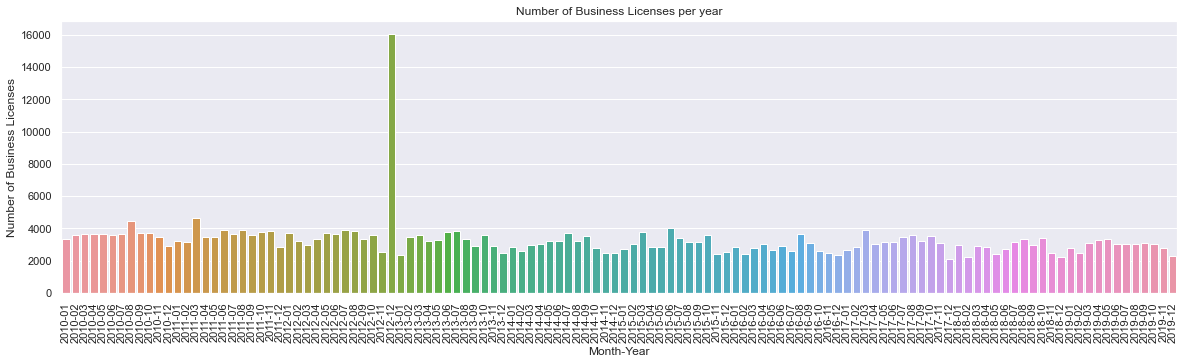

In [8]:
sns.set(rc={'figure.figsize':(20, 5)})
ax = sns.countplot(x='mo_yr_issued', data=df)

plt.title('Number of Business Licenses per year')
plt.ylabel('Number of Business Licenses')
plt.xlabel('Month-Year')
plt.xticks(rotation=90)
plt.show(ax)

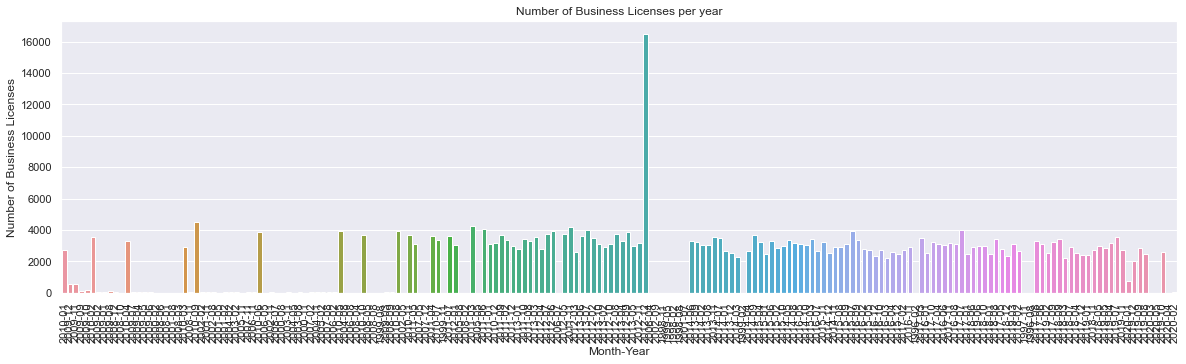

In [9]:
sns.set(rc={'figure.figsize':(20, 5)})
ax = sns.countplot(x='mo_yr_start', data=df)

plt.title('Number of Business Licenses per year')
plt.ylabel('Number of Business Licenses')
plt.xlabel('Month-Year')
plt.xticks(rotation=90)
plt.show(ax)

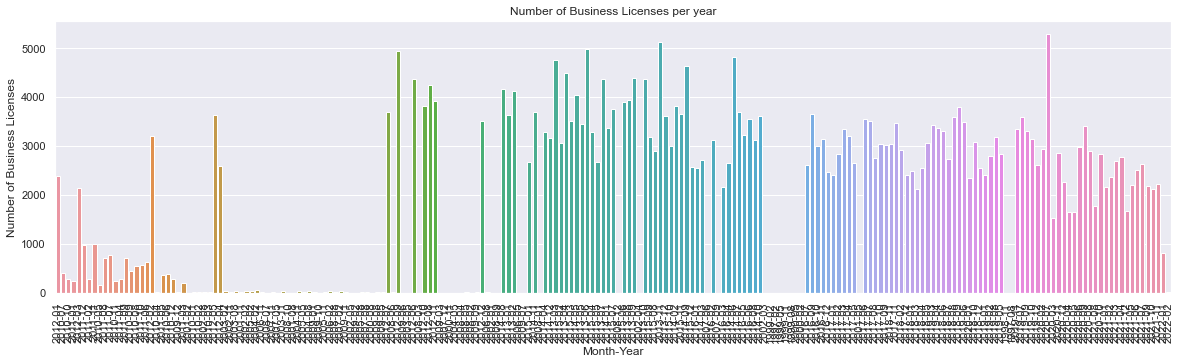

In [10]:
sns.set(rc={'figure.figsize':(20, 5)})
ax = sns.countplot(x='mo_yr_exp', data=df)

plt.title('Number of Business Licenses per year')
plt.ylabel('Number of Business Licenses')
plt.xlabel('Month-Year')
plt.xticks(rotation=90)
plt.show(ax)

***Why is there a spike in business licenses on December 2012?***

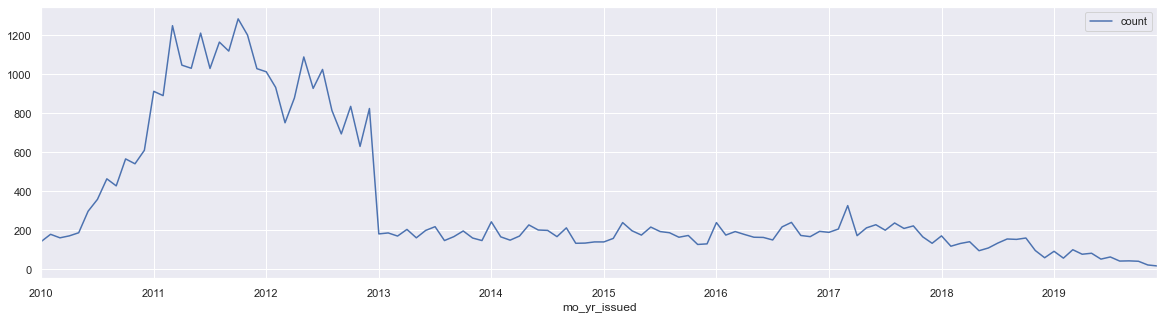

In [11]:
# Number of non-issued license statuses (cancelled, revoked, etc.)
df[df['license_status'] != 'AAI'].groupby('mo_yr_issued').id.count().reset_index(name='count').plot(x='mo_yr_issued', y='count')
plt.show()

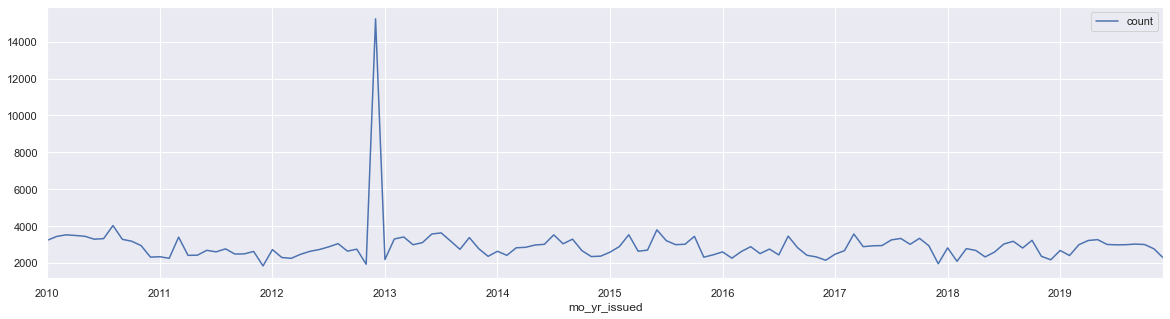

In [12]:
# Number of issued licenses
df[df['license_status'] == 'AAI'].groupby('mo_yr_issued').id.count().reset_index(name='count').plot(x='mo_yr_issued', y='count')
plt.show()

***Unclear why there is a spike, but have something to do with high number of cancellations as well. Could be a data cleaning issue over those years or some policy thing. Will probably have to limit timeframe collected***

## Filter to Geography & Time

### Chicago Only

In [13]:
# Only include Chicago business licenses
df_chi = df[df.city == 'CHICAGO']
print(df_chi.shape)
df_chi.head()

(361218, 37)


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_status,ssa,latitude,longitude,location,application_created_date,license_status_change_date,mo_yr_issued,mo_yr_start,mo_yr_exp
0,22040-20100116,2005827,63368,2,ELCENTRO INC,GRANADOS LIQUORS,1859 W 47TH ST 1,CHICAGO,IL,60609,...,AAI,10.0,41.808422,-87.672191,"{'latitude': '41.80842187721464', 'longitude':...",NaN,NaN,2010-01,2010-01,2012-01
1,2013694-20100104,2013694,349909,1,MARIO ALVARADO,WIRELESS CONNECTION,10411 S EWING AVE 1,CHICAGO,IL,60617,...,AAI,NaN,41.706017,-87.535140,"{'latitude': '41.706016505682015', 'longitude'...",2010-01-04T00:00:00.000,NaN,2010-01,2010-01,2010-07
2,1804295-20100116,2005352,29012,1,LAURIE BENNETT,FEE FEE'S,5935 W 63RD ST 1,CHICAGO,IL,60638,...,AAI,NaN,41.777772,-87.770487,"{'latitude': '41.777771632322505', 'longitude'...",NaN,NaN,2010-01,2010-01,2012-01
3,2013748-20100104,2013748,349915,1,CHRISTY LAYTON,CHECK ASAP,956 E 79TH ST 1 1,CHICAGO,IL,60619,...,AAI,51.0,41.751447,-87.600484,"{'latitude': '41.751446629747775', 'longitude'...",2010-01-04T00:00:00.000,NaN,2010-01,2010-01,2010-10
4,1517674-20100116,2006448,268200,2,CHICAGO PIZZA & PUMPING STATION CO.,BIRRIERIA Y TAQUERIA ARANDAS,1812 W 47TH ST,CHICAGO,IL,60609,...,AAI,10.0,41.808661,-87.670437,"{'latitude': '41.80866126881855', 'longitude':...",NaN,NaN,2010-01,2010-01,2012-01


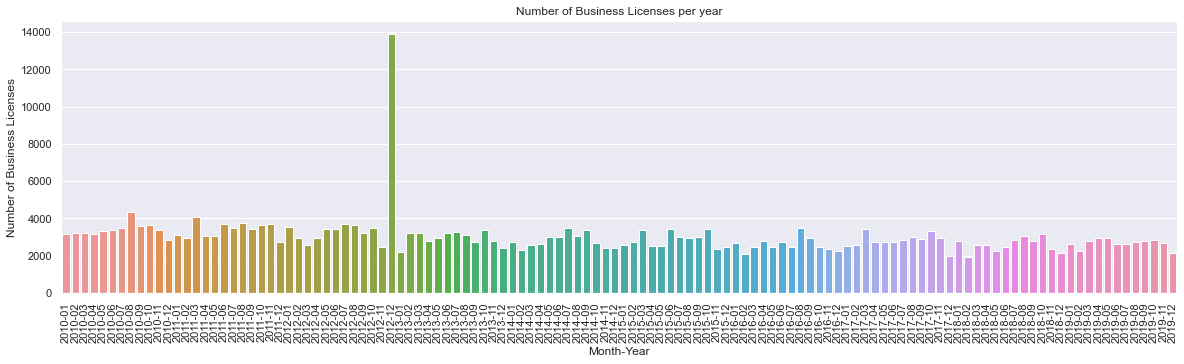

In [14]:
sns.set(rc={'figure.figsize':(20, 5)})
ax = sns.countplot(x='mo_yr_issued', data=df_chi)

plt.title('Number of Business Licenses per year')
plt.ylabel('Number of Business Licenses')
plt.xlabel('Month-Year')
plt.xticks(rotation=90)
plt.show(ax)

### Active Busineses from 2014-2018 Only

In [15]:
# Create list of month-years we care about
month_years = pd.date_range('2014-01-01','2018-12-31', 
              freq='MS').strftime("%Y-%m").tolist()
len(month_years)
month_years[:10]

['2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10']

In [24]:
# Create new columns for each month-year, indicating if row represents active business for that period
df_use = df_chi.copy()
for mo_yr in month_years:
    df_use[mo_yr] = 0
    df_use.loc[(df_use.mo_yr_start <= mo_yr) & (df_use.mo_yr_exp >= mo_yr), mo_yr] = 1

# Preview
print(df_use.shape)
df_use.head()

(361218, 97)


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,22040-20100116,2005827,63368,2,ELCENTRO INC,GRANADOS LIQUORS,1859 W 47TH ST 1,CHICAGO,IL,60609,...,0,0,0,0,0,0,0,0,0,0
1,2013694-20100104,2013694,349909,1,MARIO ALVARADO,WIRELESS CONNECTION,10411 S EWING AVE 1,CHICAGO,IL,60617,...,0,0,0,0,0,0,0,0,0,0
2,1804295-20100116,2005352,29012,1,LAURIE BENNETT,FEE FEE'S,5935 W 63RD ST 1,CHICAGO,IL,60638,...,0,0,0,0,0,0,0,0,0,0
3,2013748-20100104,2013748,349915,1,CHRISTY LAYTON,CHECK ASAP,956 E 79TH ST 1 1,CHICAGO,IL,60619,...,0,0,0,0,0,0,0,0,0,0
4,1517674-20100116,2006448,268200,2,CHICAGO PIZZA & PUMPING STATION CO.,BIRRIERIA Y TAQUERIA ARANDAS,1812 W 47TH ST,CHICAGO,IL,60609,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Add column that indicates if row should be included
df_use['total_active_months'] = df_use[month_years].sum(axis=1)
df_use['include'] = df_use.total_active_months > 0
df_use

,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,total_active_months,include
0,22040-20100116,2005827,63368,2,ELCENTRO INC,GRANADOS LIQUORS,1859 W 47TH ST 1,CHICAGO,IL,60609,...,0,0,0,0,0,0,0,0,0,False
1,2013694-20100104,2013694,349909,1,MARIO ALVARADO,WIRELESS CONNECTION,10411 S EWING AVE 1,CHICAGO,IL,60617,...,0,0,0,0,0,0,0,0,0,False
2,1804295-20100116,2005352,29012,1,LAURIE BENNETT,FEE FEE'S,5935 W 63RD ST 1,CHICAGO,IL,60638,...,0,0,0,0,0,0,0,0,0,False
3,2013748-20100104,2013748,349915,1,CHRISTY LAYTON,CHECK ASAP,956 E 79TH ST 1 1,CHICAGO,IL,60619,...,0,0,0,0,0,0,0,0,0,False
4,1517674-20100116,2006448,268200,2,CHICAGO PIZZA & PUMPING STATION CO.,BIRRIERIA Y TAQUERIA ARANDAS,1812 W 47TH ST,CHICAGO,IL,60609,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392631,2704544-20191231,2704544,465073,1,"L&X INVESTMENTS, LLC",TEA MONSTER,127 N DEARBORN ST 1ST,CHICAGO,IL,60602,...,0,0,0,0,0,0,0,0,0,False
392632,2304189-20200116,2702714,387241,1,STEVIE FULTON,STEVIE FULTON SHOE PARLOR,118 N CLARK ST,CHICAGO,IL,60602,...,0,0,0,0,0,0,0,0,0,False
392633,2709004-20191231,2709004,465439,1,GP SERVICES OF GLASS LLC,GP SERVICES OF GLASS,3150 W 36TH PL GROUNDLEVEL,CHICAGO,IL,60632,...,0,0,0,0,0,0,0,0,0,False
392634,2636529-20191231,2636529,454519,1,G DOCK LLC,HARBOR CHICAGO,1312 S WABASH AVE 1,CHICAGO,IL,60605,...,0,0,0,0,0,0,0,0,0,False


In [27]:
# Filter to only include time-relevant rows
df_use = df_use[df_use.include == True]
print(df_use.shape)
df_use.head()

(232796, 99)


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,total_active_months,include
27228,60893-20100816,2038376,19188,1,GENERAL WRECKING CO INC,GENERAL WRECKING CO INC,3426 S KEDZIE AVE 1ST,CHICAGO,IL,60623,...,0,0,0,0,0,0,0,0,8,True
35374,2037181-20101015,2037181,259,57,"JEWEL FOOD STORES, INC.",Jewel Food Store #3632,3630 N SOUTHPORT AVE 1ST AND 2ND FLOORS,CHICAGO,IL,60613,...,0,0,0,0,0,0,0,0,13,True
37518,2065076-20101103,2065076,357787,1,TAMAS PARTNERS LTD.,TAMAS PARTNERS LTD.,4954 N MARMORA AVE 1ST,CHICAGO,IL,60630,...,0,0,0,0,0,0,0,0,11,True
38087,2027067-20101116,2059343,351995,1,"VODORI, INC.","VODORI, INC.",1440 N DAYTON ST 2 200,CHICAGO,IL,60642,...,0,0,0,0,0,0,0,0,4,True
41769,2069777-20101210,2069777,54114,4,"AUTOMOTIVE MANUFACTURING AND SUPPLY COMPANY, INC.",AMSCO,4249 W DIVERSEY AVE 1 1,CHICAGO,IL,60639,...,0,0,0,0,0,0,0,0,12,True


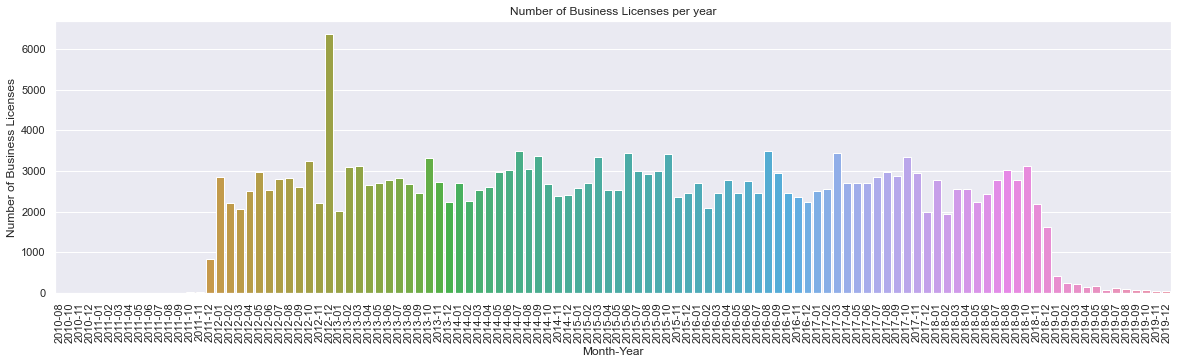

In [19]:
sns.set(rc={'figure.figsize':(20, 5)})
ax = sns.countplot(x='mo_yr_issued', data=df_use)

plt.title('Number of Business Licenses per year')
plt.ylabel('Number of Business Licenses')
plt.xlabel('Month-Year')
plt.xticks(rotation=90)
plt.show(ax)

## Check Missing Data

In [28]:
# Check how many lat-longs are missing
print('Num of missing locations:', 
      df_use['longitude'].isnull().sum(), 
      df_use['latitude'].isnull().sum(), 
      df_use['location'].isnull().sum())
df_use[df_use.location.isnull()]

Num of missing locations: 3624 3624 3624


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,total_active_months,include
85234,1167106-20120116,2126500,25931,2,FLORIDA FRUIT JUICES INC,FLORIDA FRUIT JUICES INC,7001 W 62ND ST,CHICAGO,IL,60638,...,0,0,0,0,0,0,0,0,1,True
85661,1869074-20120216,2130728,11539,9,"PIONEER PARKING, INC.",PIONEER PARKING INC,"3600 N LAKE SHORE DR BSMT, 1, 2, 3",CHICAGO,IL,60613,...,0,0,0,0,0,0,0,0,2,True
85980,2068942-20111219,2068942,358126,1,"LIGHTNING BUG OF CHICAGO, INC.",PASTEUR OF CHICAGO,5523-5525 N BROADWAY 1 REAREAST,CHICAGO,IL,60640,...,0,0,0,0,0,0,0,0,1,True
85981,2129509-20111220,2129509,368027,1,"HRB TAX GROUP, INC.",H & R BLOCK,2854 N BROADWAY 1ST A,CHICAGO,IL,60657,...,0,0,0,0,0,0,0,0,1,True
86212,1301460-20120116,2126856,42372,3,MEXICALI FOOD PRODUCTS INC,MEXICALI FOOD PRODUCTS INC,1337 W 37TH PL,CHICAGO,IL,60609,...,0,0,0,0,0,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381003,2543460-20180816,2607456,418970,1,ELIZABETH ROCK,ELIZABETH ROCK,[REDACTED FOR PRIVACY],CHICAGO,IL,60612,...,0,0,0,1,1,1,1,1,5,True
381240,2288928-20180516,2587461,376638,3,"ARETE & ASSOCIATES, LLC",FLORSHEIM MANSION,[REDACTED FOR PRIVACY],CHICAGO,IL,60610,...,1,1,1,1,1,1,1,1,8,True
383140,2551657-20180916,2615374,420803,1,MIKHEL PAUL,MIKHEL PAUL,[REDACTED FOR PRIVACY],CHICAGO,IL,60616,...,0,0,0,0,1,1,1,1,4,True
383295,2560863-20181016,2621103,422263,1,MEERA BACCHUS,MEERA BACCHUS,[REDACTED FOR PRIVACY],CHICAGO,IL,60611,...,0,0,0,0,0,1,1,1,3,True


In [29]:
print('% missing:', round(df_use['location'].isnull().sum() / df_use.shape[0] * 100, 3))

% missing: 1.557


***Not a lot of missing locations, given the total number of licenses per year--only about 2% are missing locations***

*DROP THOSE WITH NULL LOCATIONS*

In [30]:
df_use = df_use[df_use.location.notnull()]
print(df_use.shape)
df_use.head()

(229172, 99)


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,total_active_months,include
27228,60893-20100816,2038376,19188,1,GENERAL WRECKING CO INC,GENERAL WRECKING CO INC,3426 S KEDZIE AVE 1ST,CHICAGO,IL,60623,...,0,0,0,0,0,0,0,0,8,True
35374,2037181-20101015,2037181,259,57,"JEWEL FOOD STORES, INC.",Jewel Food Store #3632,3630 N SOUTHPORT AVE 1ST AND 2ND FLOORS,CHICAGO,IL,60613,...,0,0,0,0,0,0,0,0,13,True
37518,2065076-20101103,2065076,357787,1,TAMAS PARTNERS LTD.,TAMAS PARTNERS LTD.,4954 N MARMORA AVE 1ST,CHICAGO,IL,60630,...,0,0,0,0,0,0,0,0,11,True
38087,2027067-20101116,2059343,351995,1,"VODORI, INC.","VODORI, INC.",1440 N DAYTON ST 2 200,CHICAGO,IL,60642,...,0,0,0,0,0,0,0,0,4,True
41769,2069777-20101210,2069777,54114,4,"AUTOMOTIVE MANUFACTURING AND SUPPLY COMPANY, INC.",AMSCO,4249 W DIVERSEY AVE 1 1,CHICAGO,IL,60639,...,0,0,0,0,0,0,0,0,12,True


## Load Block Groups

In [31]:
# BLOCK GROUPS
blocks = gpd.read_file('data/Boundaries - Census Blocks - 2010.geojson')

print(blocks.shape)
print(blocks.crs)
blocks

(46357, 8)
epsg:4326


,statefp10,name10,blockce10,tract_bloc,geoid10,tractce10,countyfp10,geometry
0,17,Block 2010,2010,6903002010,170316903002010,690300,031,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
1,17,Block 3007,3007,6809003007,170316809003007,680900,031,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ..."
2,17,Block 3013,3013,6809003013,170316809003013,680900,031,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ..."
3,17,Block 4019,4019,2909004019,170312909004019,290900,031,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ..."
4,17,Block 4016,4016,2925004016,170312925004016,292500,031,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ..."
...,...,...,...,...,...,...,...,...
46352,17,Block 1028,1028,2203001028,170312203001028,220300,031,"MULTIPOLYGON (((-87.69323 41.92767, -87.69385 ..."
46353,17,Block 1030,1030,2203001030,170312203001030,220300,031,"MULTIPOLYGON (((-87.69320 41.92667, -87.69351 ..."
46354,17,Block 2014,2014,8310002014,170318310002014,831000,031,"MULTIPOLYGON (((-87.67759 41.91624, -87.67759 ..."
46355,17,Block 2001,2001,8310002001,170318310002001,831000,031,"MULTIPOLYGON (((-87.67398 41.91783, -87.67397 ..."


In [32]:
# NEIGHBORHOODS
areas = gpd.read_file("data/Boundaries - Neighborhoods.geojson")

print(areas.shape)
print(areas.crs)
areas

(98, 5)
epsg:4326


,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
1,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ..."
2,United Center,UNITED CENTER,32520512.7053,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ..."
4,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ..."
...,...,...,...,...,...
93,Belmont Cragin,"BELMONT CRAGIN,HERMOSA",109099407.211,43311.706886,"MULTIPOLYGON (((-87.74143 41.91698, -87.74141 ..."
94,Austin,AUSTIN,170037750.826,55473.345911,"MULTIPOLYGON (((-87.75620 41.91547, -87.75588 ..."
95,Gold Coast,GOLD COAST,7165705.53467,13685.479377,"MULTIPOLYGON (((-87.62646 41.91147, -87.62640 ..."
96,Boystown,BOYSTOWN,3365778.97115,9780.268985,"MULTIPOLYGON (((-87.64878 41.93999, -87.64927 ..."


In [33]:
# Checks
print(blocks.blockce10.nunique())
print(blocks.geoid10.nunique())
print(areas.pri_neigh.nunique())

651
46311
98


In [34]:
# Clean Block Groups
block_areas = blocks.copy()
block_areas["blockgroup"] = block_areas["geoid10"].str[0:12]
block_areas = block_areas[["geometry", "blockgroup"]]

# Merge with Neighborhoods
block_areas = gpd.sjoin(block_areas, areas, how="left", op='intersects')
block_areas.head()

,geometry,blockgroup,index_right,pri_neigh,sec_neigh,shape_area,shape_len
0,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ...",170316903002,20,Grand Crossing,"SOUTH SHORE, GRAND CROSSING",98853167.7093,54645.3303
1,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ...",170316809003,19,Englewood,ENGLEWOOD,173600015.009,56144.046048
2,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ...",170316809003,19,Englewood,ENGLEWOOD,173600015.009,56144.046048
3,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ...",170312909004,6,North Lawndale,NORTH LAWNDALE,89487422.0244,44959.459663
4,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ...",170312925004,6,North Lawndale,NORTH LAWNDALE,89487422.0244,44959.459663


In [35]:
# Dissolve areas by block group
block_areas = block_areas.dissolve(by='blockgroup', aggfunc='first')
block_areas.head()

,geometry,index_right,pri_neigh,sec_neigh,shape_area,shape_len
blockgroup,,,,,,
170310101001,"POLYGON ((-87.67009 42.02115, -87.67047 42.021...",48,Rogers Park,ROGERS PARK,51259902.4506,34052.397576
170310101002,"POLYGON ((-87.66950 42.01936, -87.66963 42.019...",48,Rogers Park,ROGERS PARK,51259902.4506,34052.397576
170310101003,"POLYGON ((-87.66681 42.01924, -87.66780 42.019...",48,Rogers Park,ROGERS PARK,51259902.4506,34052.397576
170310102011,"POLYGON ((-87.68234 42.01250, -87.68268 42.012...",48,Rogers Park,ROGERS PARK,51259902.4506,34052.397576
170310102012,"POLYGON ((-87.67972 42.01392, -87.68003 42.013...",48,Rogers Park,ROGERS PARK,51259902.4506,34052.397576


In [36]:
block_areas = block_areas[["geometry", "pri_neigh"]].reset_index()
block_areas.head()

,blockgroup,geometry,pri_neigh
0,170310101001,"POLYGON ((-87.67009 42.02115, -87.67047 42.021...",Rogers Park
1,170310101002,"POLYGON ((-87.66950 42.01936, -87.66963 42.019...",Rogers Park
2,170310101003,"POLYGON ((-87.66681 42.01924, -87.66780 42.019...",Rogers Park
3,170310102011,"POLYGON ((-87.68234 42.01250, -87.68268 42.012...",Rogers Park
4,170310102012,"POLYGON ((-87.67972 42.01392, -87.68003 42.013...",Rogers Park


## Merge Business License Data with Block Group Data

In [37]:
# Convert df_chi into geopandas
chi_gdf = gpd.GeoDataFrame(df_use, crs ='epsg:4326', geometry=gpd.points_from_xy(df_use.longitude, df_use.latitude))

print(chi_gdf.shape)
print(chi_gdf.crs)
chi_gdf.head()

(229172, 100)
epsg:4326


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,total_active_months,include,geometry
27228,60893-20100816,2038376,19188,1,GENERAL WRECKING CO INC,GENERAL WRECKING CO INC,3426 S KEDZIE AVE 1ST,CHICAGO,IL,60623,...,0,0,0,0,0,0,0,8,True,POINT (-87.70479 41.83082)
35374,2037181-20101015,2037181,259,57,"JEWEL FOOD STORES, INC.",Jewel Food Store #3632,3630 N SOUTHPORT AVE 1ST AND 2ND FLOORS,CHICAGO,IL,60613,...,0,0,0,0,0,0,0,13,True,POINT (-87.66419 41.94800)
37518,2065076-20101103,2065076,357787,1,TAMAS PARTNERS LTD.,TAMAS PARTNERS LTD.,4954 N MARMORA AVE 1ST,CHICAGO,IL,60630,...,0,0,0,0,0,0,0,11,True,POINT (-87.77598 41.97187)
38087,2027067-20101116,2059343,351995,1,"VODORI, INC.","VODORI, INC.",1440 N DAYTON ST 2 200,CHICAGO,IL,60642,...,0,0,0,0,0,0,0,4,True,POINT (-87.64957 41.90757)
41769,2069777-20101210,2069777,54114,4,"AUTOMOTIVE MANUFACTURING AND SUPPLY COMPANY, INC.",AMSCO,4249 W DIVERSEY AVE 1 1,CHICAGO,IL,60639,...,0,0,0,0,0,0,0,12,True,POINT (-87.73344 41.93160)


In [38]:
# Merge
merged_gdf = gpd.sjoin(chi_gdf, block_areas, how='left', op='intersects')
print(merged_gdf.shape)
merged_gdf.head()

(229172, 103)


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,2018-09,2018-10,2018-11,2018-12,total_active_months,include,geometry,index_right,blockgroup,pri_neigh
27228,60893-20100816,2038376,19188,1,GENERAL WRECKING CO INC,GENERAL WRECKING CO INC,3426 S KEDZIE AVE 1ST,CHICAGO,IL,60623,...,0,0,0,0,8,True,POINT (-87.70479 41.83082),1919.0,170318305003,Little Village
35374,2037181-20101015,2037181,259,57,"JEWEL FOOD STORES, INC.",Jewel Food Store #3632,3630 N SOUTHPORT AVE 1ST AND 2ND FLOORS,CHICAGO,IL,60613,...,0,0,0,0,13,True,POINT (-87.66419 41.94800),231.0,170310604002,Lake View
37518,2065076-20101103,2065076,357787,1,TAMAS PARTNERS LTD.,TAMAS PARTNERS LTD.,4954 N MARMORA AVE 1ST,CHICAGO,IL,60630,...,0,0,0,0,11,True,POINT (-87.77598 41.97187),463.0,170311104003,Jefferson Park
38087,2027067-20101116,2059343,351995,1,"VODORI, INC.","VODORI, INC.",1440 N DAYTON ST 2 200,CHICAGO,IL,60642,...,0,0,0,0,4,True,POINT (-87.64957 41.90757),2151.0,170318422001,River North
41769,2069777-20101210,2069777,54114,4,"AUTOMOTIVE MANUFACTURING AND SUPPLY COMPANY, INC.",AMSCO,4249 W DIVERSEY AVE 1 1,CHICAGO,IL,60639,...,0,0,0,0,12,True,POINT (-87.73344 41.93160),714.0,170312002001,Hermosa


## Create Block by Month-Year Counts

In [39]:
#Filter to only include issued licenses (not cancelled or revoked)
aai_only = merged_gdf[merged_gdf.license_status == 'AAI'].copy()
print(aai_only.shape[0], 'rows in aai_only')

208958 rows in aai_only


In [40]:
# Select columns to keep
aai_only = aai_only[['blockgroup', 'pri_neigh', 'total_active_months',
                     'mo_yr_start', 'mo_yr_exp', 'mo_yr_issued',
                     'application_type', 'license_number', 'address',
                     'doing_business_as_name', 'account_number'] + month_years]
aai_only.head()

,blockgroup,pri_neigh,total_active_months,mo_yr_start,mo_yr_exp,mo_yr_issued,application_type,license_number,address,doing_business_as_name,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
27228,170318305003,Little Village,8,2010-08,2014-08,2010-08,RENEW,60893,3426 S KEDZIE AVE 1ST,GENERAL WRECKING CO INC,...,0,0,0,0,0,0,0,0,0,0
35374,170310604002,Lake View,13,2010-10,2015-01,2010-10,ISSUE,2037181,3630 N SOUTHPORT AVE 1ST AND 2ND FLOORS,Jewel Food Store #3632,...,0,0,0,0,0,0,0,0,0,0
38087,170318422001,River North,4,2010-11,2014-04,2010-11,RENEW,2027067,1440 N DAYTON ST 2 200,"VODORI, INC.",...,0,0,0,0,0,0,0,0,0,0
41769,170312002001,Hermosa,12,2010-12,2014-12,2010-12,C_LOC,2069777,4249 W DIVERSEY AVE 1 1,AMSCO,...,0,0,0,0,0,0,0,0,0,0
42808,170318330002,West Loop,13,2010-12,2015-01,2010-12,ISSUE,2069971,1123 W WASHINGTON BLVD 2ND,LESLIE JONES & ASSOCIATES INC.,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# CHECK: Total number of licenses active on 12/2018
print('These should be the same:')
print(aai_only[aai_only.blockgroup.notnull()]['2018-12'].sum())
print(aai_only.groupby('blockgroup')['2018-12'].sum().sum()) # non-null values for blockgroups

These should be the same:
55994
55994


In [42]:
# Initiate new block-month-year dataframe
block_mo_yr = pd.DataFrame(columns=['blockgroup', 'month-year', 'active', 'new'])
block_mo_yr

,blockgroup,month-year,active,new


In [43]:
# Generate relevant counts (unique business identified as unique address)
for mo_yr in month_years:
    # Active Businesses
    activ_bus = aai_only[aai_only[mo_yr] == 1].groupby('blockgroup').address.nunique().reset_index(name='active')
    
    # Newly Licensed Businesses
    new_bus = aai_only[(aai_only.application_type == 'ISSUE') &
                       (aai_only.mo_yr_issued == mo_yr)].groupby('blockgroup').address.nunique().reset_index(name='new')
    
    # Merge numbers and add to block_mo_yr dataframe
    merged = activ_bus.merge(new_bus, on='blockgroup', how='outer')
    merged['month-year'] = mo_yr
    block_mo_yr = block_mo_yr.append(merged, ignore_index=True)

In [44]:
# Preview
block_mo_yr.sort_values('active', ascending=False)

,blockgroup,month-year,active,new
6370,170318391001,2014-03,1862,22.0
4211,170318391001,2014-02,1854,23.0
2053,170318391001,2014-01,1842,16.0
57989,170318391001,2016-03,1831,14.0
55839,170318391001,2016-02,1831,15.0
...,...,...,...,...
18020,170312207023,2014-09,1,NaN
120064,170317205001,2018-08,1,NaN
64386,170318357001,2016-06,1,NaN
64378,170318351002,2016-06,1,NaN


In [45]:
# Sanity Checks
print(block_mo_yr['month-year'].nunique()) #should be 60
print(block_mo_yr['blockgroup'].nunique()) #no more than 2176
print('max number of active businesses in a given month:', block_mo_yr.groupby('month-year').active.sum().max())
print('number of unique businesses (max above should not exceed this):', aai_only.address.nunique())

print(block_mo_yr.active.isna().sum()) # should not be many
print(block_mo_yr.new.isna().sum()) # ok if many

60
2175
max number of active businesses in a given month: 47318
number of unique businesses (max above should not exceed this): 71497
0
106295


In [46]:
# Replace NAs in 'new' column with zeroes
block_mo_yr.new.fillna(0, inplace=True)
print(block_mo_yr.active.isna().sum())
block_mo_yr

0


,blockgroup,month-year,active,new
0,170310101001,2014-01,4,0.0
1,170310101002,2014-01,22,0.0
2,170310101003,2014-01,12,0.0
3,170310102011,2014-01,2,0.0
4,170310102012,2014-01,35,0.0
...,...,...,...,...
129003,170318439003,2018-12,4,0.0
129004,170318439004,2018-12,3,0.0
129005,170318439005,2018-12,2,0.0
129006,170319800001,2018-12,11,0.0


In [47]:
# Check datatypes
block_mo_yr.dtypes

blockgroup     object
month-year     object
active         object
new           float64
dtype: object

In [49]:
# Clean up datatypes
block_mo_yr['active'] = pd.to_numeric(block_mo_yr['active'])
block_mo_yr['month-year'] = pd.to_datetime(block_mo_yr['month-year'])
block_mo_yr.sort_values('new', ascending=False)

,blockgroup,month-year,active,new
88221,170319801001,2017-05-01,98,47.0
64945,170310817002,2016-07-01,326,32.0
12843,170318391001,2014-06-01,1746,31.0
47249,170318391001,2015-10-01,1804,30.0
66597,170318391001,2016-07-01,1718,29.0
...,...,...,...,...
47626,170310630001,2015-11-01,50,0.0
47625,170310629003,2015-11-01,17,0.0
47624,170310629002,2015-11-01,13,0.0
47623,170310629001,2015-11-01,33,0.0


In [50]:
block_mo_yr.dtypes

blockgroup            object
month-year    datetime64[ns]
active                 int64
new                  float64
dtype: object

In [51]:
block_mo_yr['month'] = block_mo_yr['month-year'].dt.month
block_mo_yr['year'] = block_mo_yr['month-year'].dt.year
block_mo_yr

,blockgroup,month-year,active,new,month,year
0,170310101001,2014-01-01,4,0.0,1,2014
1,170310101002,2014-01-01,22,0.0,1,2014
2,170310101003,2014-01-01,12,0.0,1,2014
3,170310102011,2014-01-01,2,0.0,1,2014
4,170310102012,2014-01-01,35,0.0,1,2014
...,...,...,...,...,...,...
129003,170318439003,2018-12-01,4,0.0,12,2018
129004,170318439004,2018-12-01,3,0.0,12,2018
129005,170318439005,2018-12-01,2,0.0,12,2018
129006,170319800001,2018-12-01,11,0.0,12,2018


## Add More Features

### Previous Years

In [52]:
years = [yr for yr in range(2014, 2019)]
years

[2014, 2015, 2016, 2017, 2018]

In [66]:
to_merge_df = pd.DataFrame(columns=('blockgroup', 'month-year', 'prev_month-year', 'prev_yr_active', 'prev_yr_new'))

for yr in years[1:]:
    # Previous years
    prev_yr_df = block_mo_yr[block_mo_yr['year'] == yr - 1][['blockgroup', 'month-year', 'active', 'new']]
    prev_yr_df.rename(columns={'month-year': 'prev_month-year',
                               'active': 'prev_yr_active',
                               'new': 'prev_yr_new'}, inplace=True)
    prev_yr_df['month-year'] = prev_yr_df['prev_month-year'] + pd.offsets.DateOffset(years=1)
    
    # Append to working df to merge with main block_mo_yr df
    to_merge_df = to_merge_df.append(prev_yr_df, ignore_index=True)

    #Check
    print(yr - 1, ': ', prev_yr_df.shape[0], 'rows')

to_merge_df

2014 :  25866 rows
2015 :  25783 rows
2016 :  25818 rows
2017 :  25786 rows


,blockgroup,month-year,prev_month-year,prev_yr_active,prev_yr_new
0,170310101001,2015-01-01,2014-01-01,4,0.0
1,170310101002,2015-01-01,2014-01-01,22,0.0
2,170310101003,2015-01-01,2014-01-01,12,0.0
3,170310102011,2015-01-01,2014-01-01,2,0.0
4,170310102012,2015-01-01,2014-01-01,35,0.0
...,...,...,...,...,...
103248,170318439003,2018-12-01,2017-12-01,3,0.0
103249,170318439004,2018-12-01,2017-12-01,1,0.0
103250,170318439005,2018-12-01,2017-12-01,1,0.0
103251,170319800001,2018-12-01,2017-12-01,7,2.0


In [71]:
# Sanity Check
print('These should match:')
print(block_mo_yr[block_mo_yr.year == 2018].shape[0] + to_merge_df.shape[0])
print(block_mo_yr.shape[0])

print(to_merge_df['month-year'].nunique(), 'months in previous years')
print(block_mo_yr['month-year'].nunique(), 'months in current years')
print(to_merge_df.blockgroup.nunique(), 'blockgroups in previous years')
print(block_mo_yr.blockgroup.nunique(), 'blockgroups in current years')
print(block_mo_yr.year.value_counts())

These should match:
129008
129008
48 months in previous years
60 months in current years
2175 blockgroups in previous years
2175 blockgroups in current years
2014    25866
2016    25818
2017    25786
2015    25783
2018    25755
Name: year, dtype: int64


In [74]:
# Merge with main dataframe
block_mo_yr = block_mo_yr.merge(to_merge_df, on=['blockgroup', 'month-year'], how='left')
block_mo_yr

,blockgroup,month-year,active,new,month,year,prev_month-year,prev_yr_active,prev_yr_new
0,170310101001,2014-01-01,4,0.0,1,2014,NaT,NaN,NaN
1,170310101002,2014-01-01,22,0.0,1,2014,NaT,NaN,NaN
2,170310101003,2014-01-01,12,0.0,1,2014,NaT,NaN,NaN
3,170310102011,2014-01-01,2,0.0,1,2014,NaT,NaN,NaN
4,170310102012,2014-01-01,35,0.0,1,2014,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...
129003,170318439003,2018-12-01,4,0.0,12,2018,2017-12-01,3,0.0
129004,170318439004,2018-12-01,3,0.0,12,2018,2017-12-01,1,0.0
129005,170318439005,2018-12-01,2,0.0,12,2018,2017-12-01,1,0.0
129006,170319800001,2018-12-01,11,0.0,12,2018,2017-12-01,7,2.0


In [76]:
# Add % Change Attributes
block_mo_yr['%_change_active'] = ((block_mo_yr['active'] - block_mo_yr['prev_yr_active']) 
                                  / block_mo_yr['prev_yr_active']).fillna(0)
block_mo_yr

,blockgroup,month-year,active,new,month,year,prev_month-year,prev_yr_active,prev_yr_new,%_change_active
0,170310101001,2014-01-01,4,0.0,1,2014,NaT,NaN,NaN,0.000000
1,170310101002,2014-01-01,22,0.0,1,2014,NaT,NaN,NaN,0.000000
2,170310101003,2014-01-01,12,0.0,1,2014,NaT,NaN,NaN,0.000000
3,170310102011,2014-01-01,2,0.0,1,2014,NaT,NaN,NaN,0.000000
4,170310102012,2014-01-01,35,0.0,1,2014,NaT,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...
129003,170318439003,2018-12-01,4,0.0,12,2018,2017-12-01,3,0.0,1.333333
129004,170318439004,2018-12-01,3,0.0,12,2018,2017-12-01,1,0.0,3.000000
129005,170318439005,2018-12-01,2,0.0,12,2018,2017-12-01,1,0.0,2.000000
129006,170319800001,2018-12-01,11,0.0,12,2018,2017-12-01,7,2.0,1.571429


In [77]:
# Add % Change Attributes
block_mo_yr['%_change_new'] = ((block_mo_yr['new'] - block_mo_yr['prev_yr_new'])
                               / block_mo_yr['prev_yr_new']).fillna(0)
block_mo_yr

,blockgroup,month-year,active,new,month,year,prev_month-year,prev_yr_active,prev_yr_new,%_change_active,%_change_new
0,170310101001,2014-01-01,4,0.0,1,2014,NaT,NaN,NaN,0.000000,0.0
1,170310101002,2014-01-01,22,0.0,1,2014,NaT,NaN,NaN,0.000000,0.0
2,170310101003,2014-01-01,12,0.0,1,2014,NaT,NaN,NaN,0.000000,0.0
3,170310102011,2014-01-01,2,0.0,1,2014,NaT,NaN,NaN,0.000000,0.0
4,170310102012,2014-01-01,35,0.0,1,2014,NaT,NaN,NaN,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
129003,170318439003,2018-12-01,4,0.0,12,2018,2017-12-01,3,0.0,1.333333,0.0
129004,170318439004,2018-12-01,3,0.0,12,2018,2017-12-01,1,0.0,3.000000,0.0
129005,170318439005,2018-12-01,2,0.0,12,2018,2017-12-01,1,0.0,2.000000,0.0
129006,170319800001,2018-12-01,11,0.0,12,2018,2017-12-01,7,2.0,1.571429,0.0


In [78]:
block_mo_yr.to_csv("data/business_licenses_by_blockgroup.csv", index=False)